# Working With EEG dataset

In [1]:
import mne

In [7]:
data = mne.io.read_raw_edf('/home/parthshr370/Downloads/EEG/eeg-during-mental-arithmetic-tasks-1.0.0/Subject01_2.edf')

Extracting EDF parameters from /home/parthshr370/Downloads/EEG/eeg-during-mental-arithmetic-tasks-1.0.0/Subject01_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [8]:
from glob import glob 
import pandas as pd 

import numpy as np 
import mne 
import os
import matplotlib.pyplot as plt 

In [5]:
ls

 20_reading_eeg_data.ipynb
'Assignment IIT Roorkie.pdf'
'Atlas of EEG Sample Pages 12 pg.pdf'
 data-04-00014.pdf
 eeg-during-mental-arithmetic-tasks-1.0.0/
 EEG.ipynb


In [6]:
ls eeg-during-mental-arithmetic-tasks-1.0.0/

README.txt       Subject08_1.edf  Subject17_2.edf  Subject27_1.edf
RECORDS          Subject08_2.edf  Subject18_1.edf  Subject27_2.edf
SHA256SUMS.txt   Subject09_1.edf  Subject18_2.edf  Subject28_1.edf
Subject00_1.edf  Subject09_2.edf  Subject19_1.edf  Subject28_2.edf
Subject00_2.edf  Subject10_1.edf  Subject19_2.edf  Subject29_1.edf
Subject01_1.edf  Subject10_2.edf  Subject20_1.edf  Subject29_2.edf
Subject01_2.edf  Subject11_1.edf  Subject20_2.edf  Subject30_1.edf
Subject02_1.edf  Subject11_2.edf  Subject21_1.edf  Subject30_2.edf
Subject02_2.edf  Subject12_1.edf  Subject21_2.edf  Subject31_1.edf
Subject03_1.edf  Subject12_2.edf  Subject22_1.edf  Subject31_2.edf
Subject03_2.edf  Subject13_1.edf  Subject22_2.edf  Subject32_1.edf
Subject04_1.edf  Subject13_2.edf  Subject23_1.edf  Subject32_2.edf
Subject04_2.edf  Subject14_1.edf  Subject23_2.edf  Subject33_1.edf
Subject05_1.edf  Subject14_2.edf  Subject24_1.edf  Subject33_2.edf
Subject05_2.edf  Subject15_1.edf  Subject24_2.edf  Subject34_1

In [11]:
data.describe()

<RawEDF | Subject01_2.edf, 21 x 31000 (62.0 s), ~21 kB, data not loaded>
ch  name       type  unit        min         Q1     median         Q3        max
 0  EEG Fp1    EEG   µV       -53.46      -7.95       0.00       8.07      69.61
 1  EEG Fp2    EEG   µV       -43.34      -6.28       0.20       6.82      58.35
 2  EEG F3     EEG   µV       -63.67      -7.17      -0.05       7.30      52.69
 3  EEG F4     EEG   µV       -45.77      -6.96       0.16       7.73      65.22
 4  EEG F7     EEG   µV       -60.67      -8.81      -0.00       9.02      54.54
 5  EEG F8     EEG   µV       -76.15      -9.58      -0.00       9.57      65.47
 6  EEG T3     EEG   µV      -161.62      -7.49      -0.00       6.93      70.36
 7  EEG T4     EEG   µV       -43.09      -8.38       0.00       7.54      55.64
 8  EEG C3     EEG   µV       -62.57      -7.03      -0.00       7.07      50.10
 9  EEG C4     EEG   µV       -87.95      -7.20      -0.00       7.26      42.22
10  EEG T5     EEG   µV       -52.60

In [14]:
data.plot

<bound method BaseRaw.plot of <RawEDF | Subject01_2.edf, 21 x 31000 (62.0 s), ~21 kB, data not loaded>>

# trying to do PSD

In [18]:
import os 
import mne 

sample_data_folder = mne.datasets.sample.data_path()

Using default location ~/mne_data for sample...
Creating ~/mne_data


100%|█████████████████████████████████████| 1.65G/1.65G [00:00<00:00, 1.92TB/s]
Untarring contents of '/home/parthshr370/mne_data/MNE-sample-data-processed.tar.gz' to '/home/parthshr370/mne_data'


Attempting to create new mne-python configuration file:
/home/parthshr370/.mne/mne-python.json
Download complete in 03m49s (1576.2 MB)


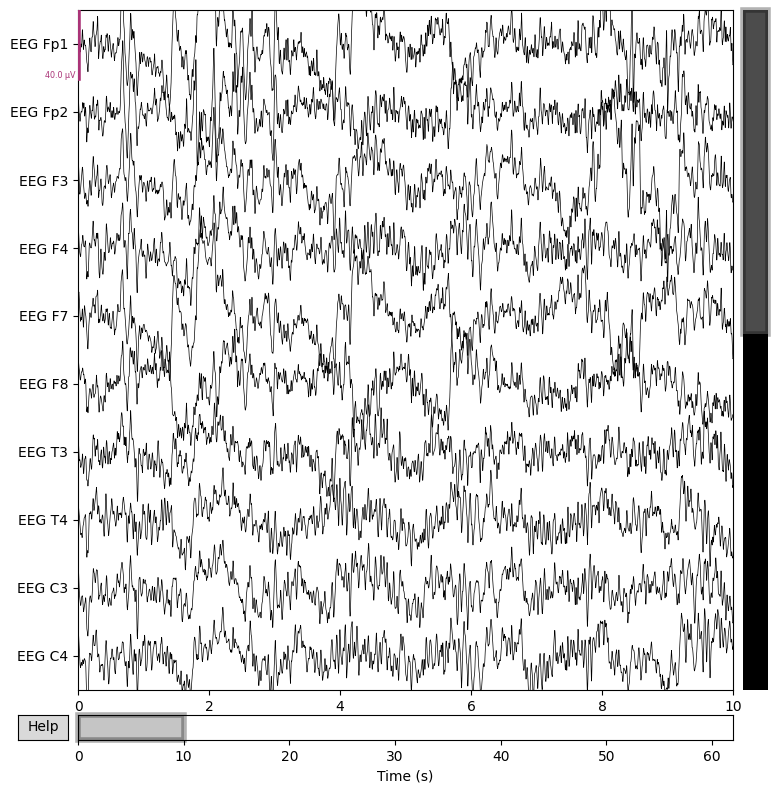

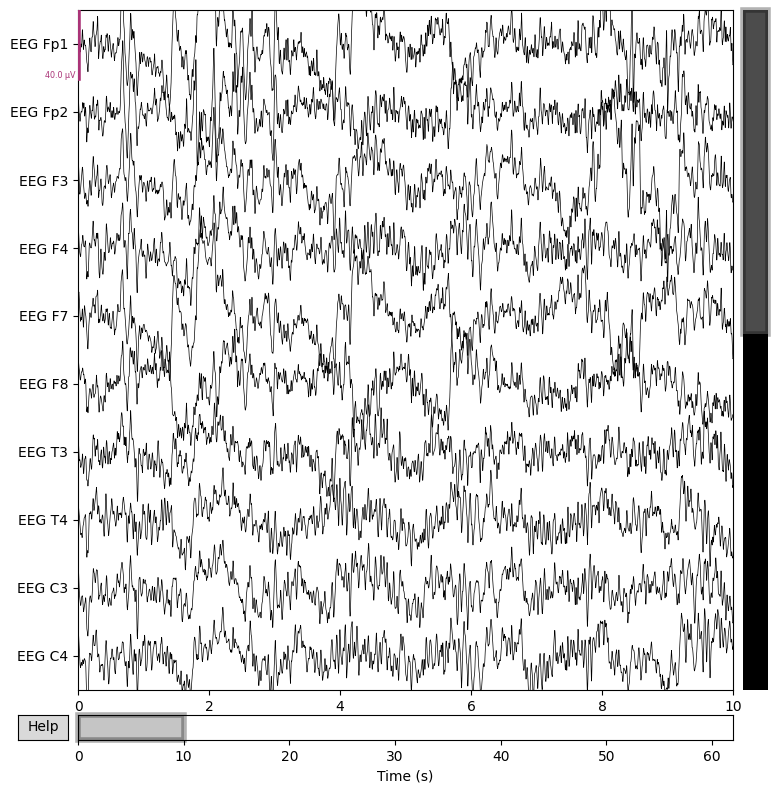

In [39]:
data.plot(n_channels = 10)

In [20]:
sample_data_raw_file = os.path.join(sample_data_folder,"MEG","sample", "sample_audvis_raw.fif")

In [21]:
raw = mne.io.read_raw_fif(sample_data_raw_file)
raw.crop(tmax = 60).load_data() # makes sure to crop the relevant information in the file upto what you want exactly


Opening raw data file /home/parthshr370/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Reading 0 ... 36037  =      0.000 ...    60.000 secs...


Measurement date,"December 03, 2002 19:01:10 GMT"
Experimenter,MEG
Participant,Unknown
Digitized points,146 points
Good channels,"203 Gradiometers, 102 Magnetometers, 9 Stimulus, 59 EEG, 1 EOG"
Bad channels,"MEG 2443, EEG 053"
EOG channels,EOG 061
ECG channels,Not available
Sampling frequency,600.61 Hz
Highpass,0.10 Hz
Lowpass,172.18 Hz


### Raw data files can be cropped upto a particular time we want upto

1. n_channels define how many channels of information we want out of it 

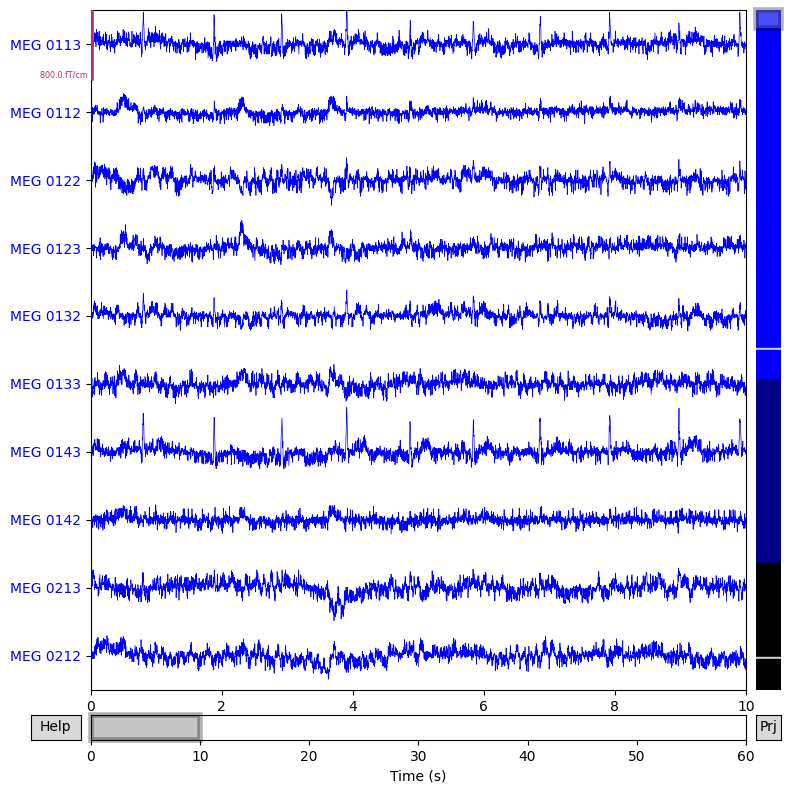

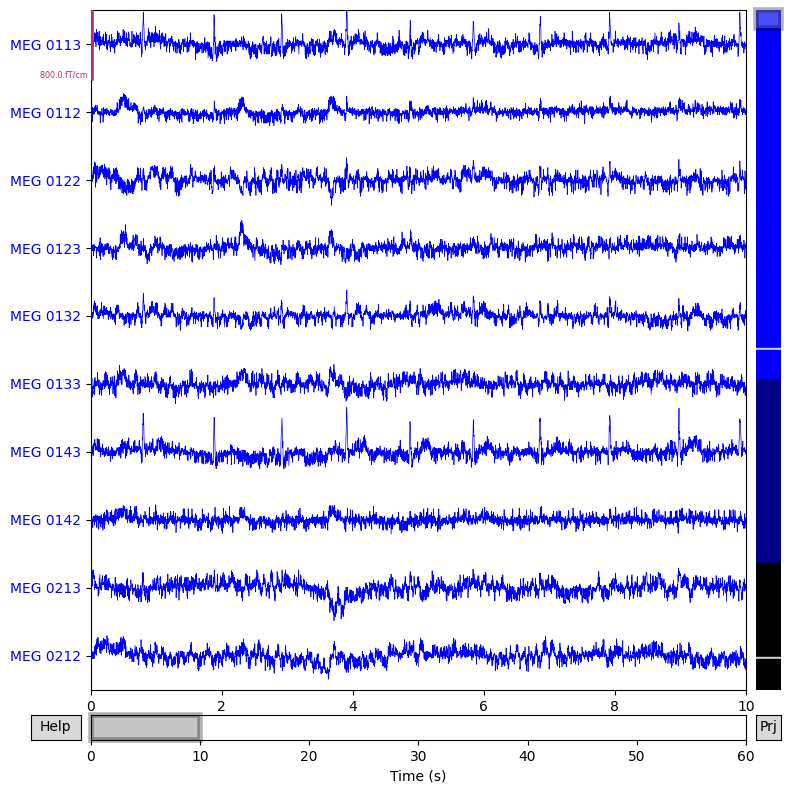

In [25]:
raw.plot(n_channels = 10)

Effective window size : 3.410 (s)
Plotting amplitude spectral density (dB=True).


/home/parthshr370/parthpython/lib/python3.12/site-packages/mne/viz/utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


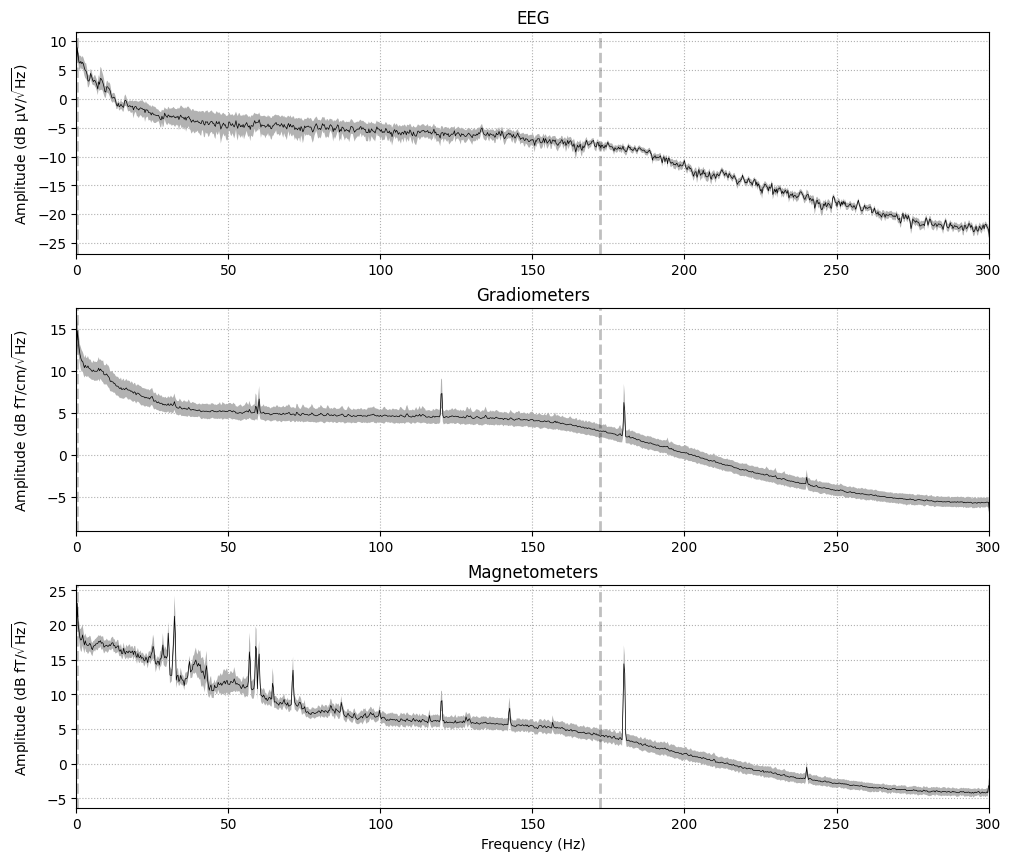

In [29]:
# Trying to compute spectrums or psd

spectrum = raw.compute_psd()
spectrum.plot(average = True , picks = 'data',exclude = 'bads',amplitude = True ,spatial_colors='blue')


These vertical lines indicate filter boundries where it crosses eventually for our filter 

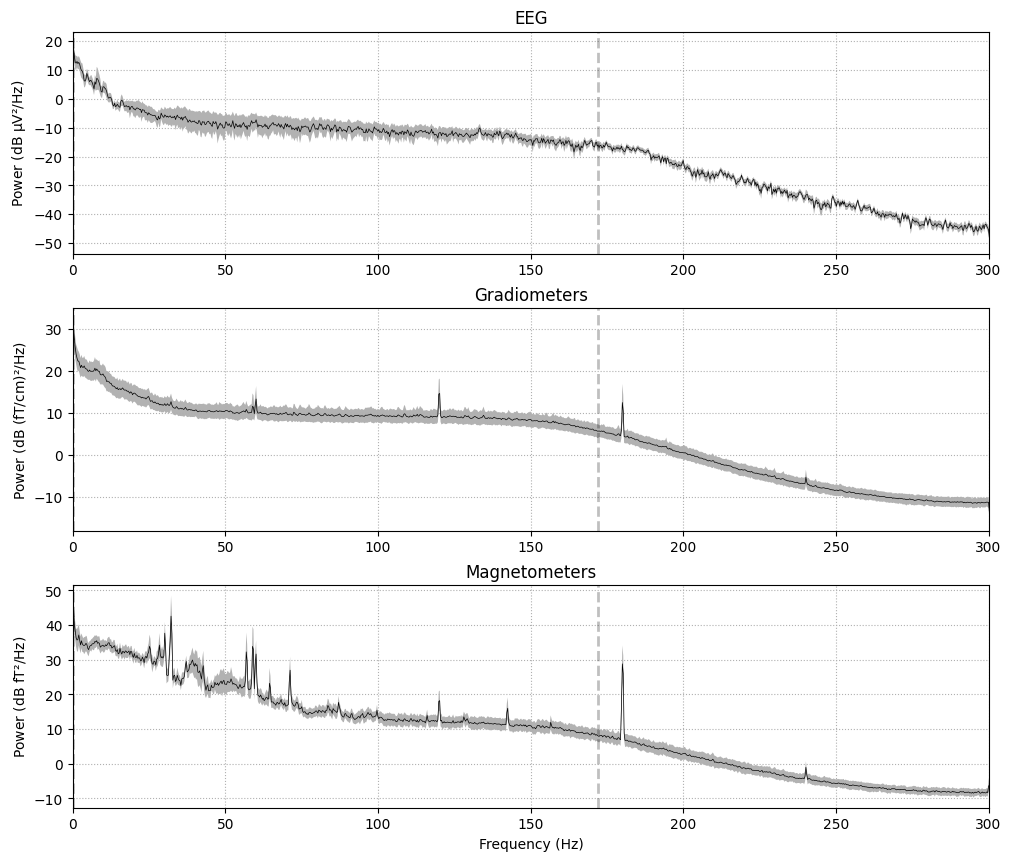

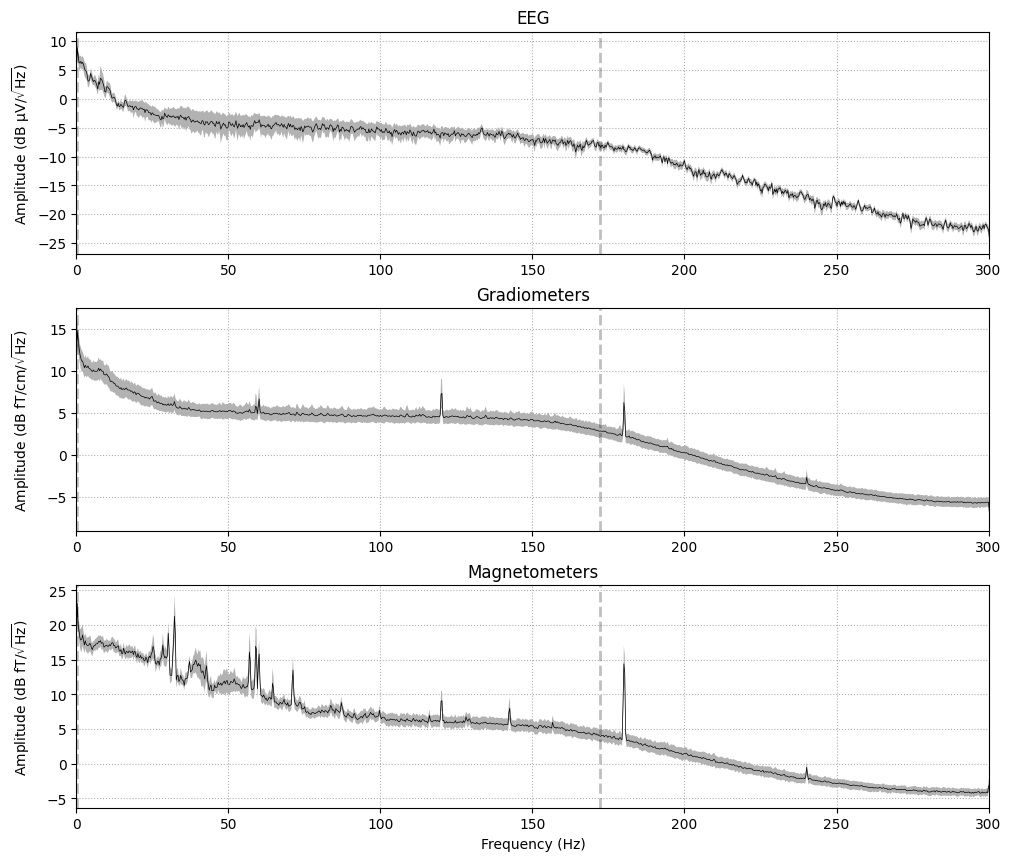

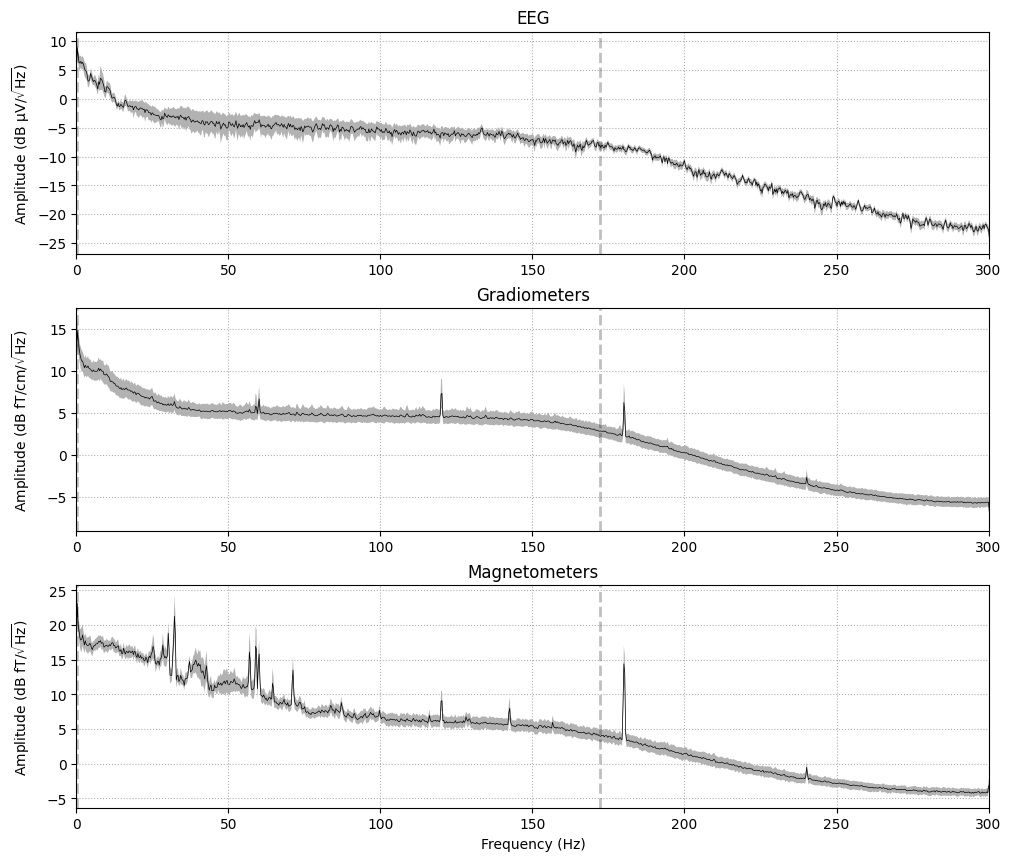

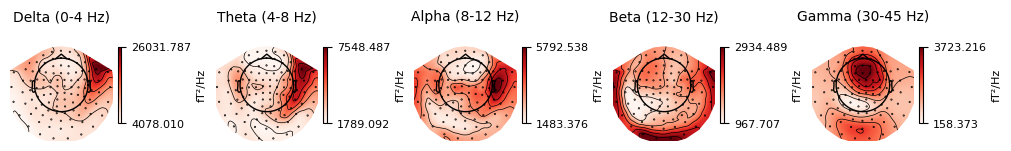

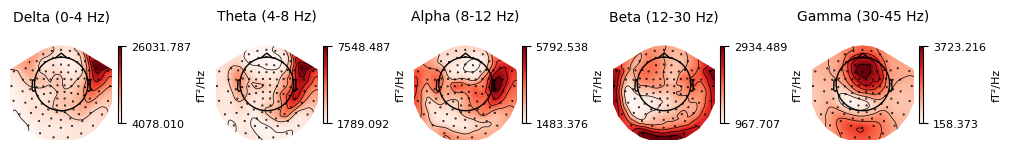

In [30]:
spectrum.plot_topomap()

## This produces 5 different frequency bands and their readings 

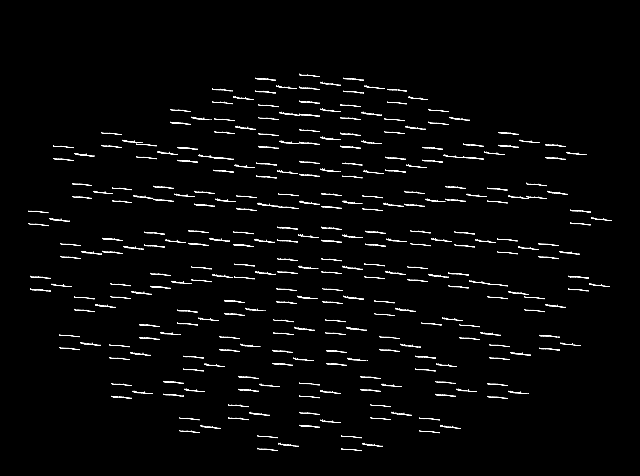

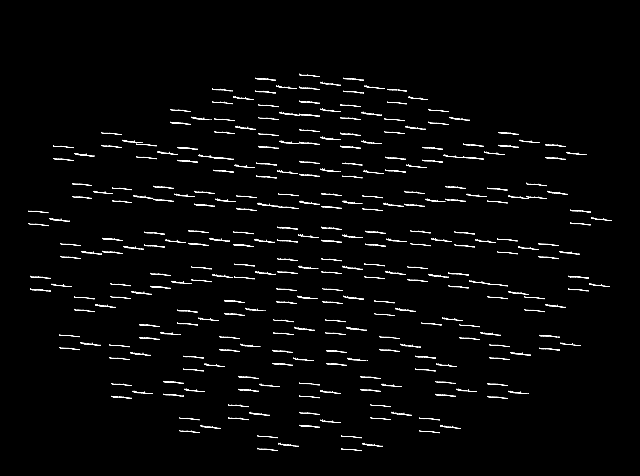

In [32]:
spectrum.plot_topo()

# this just shows the MEG channels 

### Just EEG Bands in the topo graph

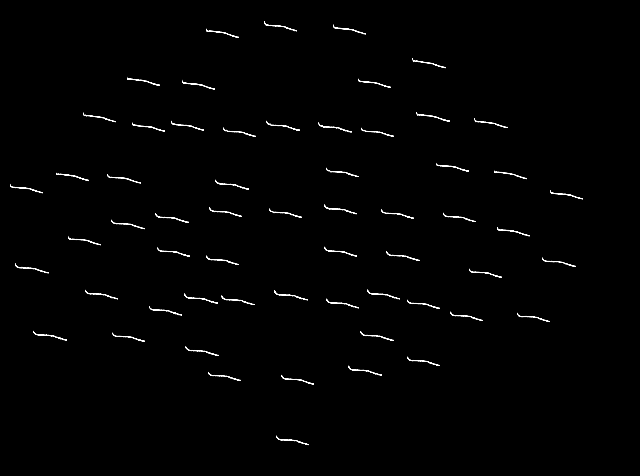

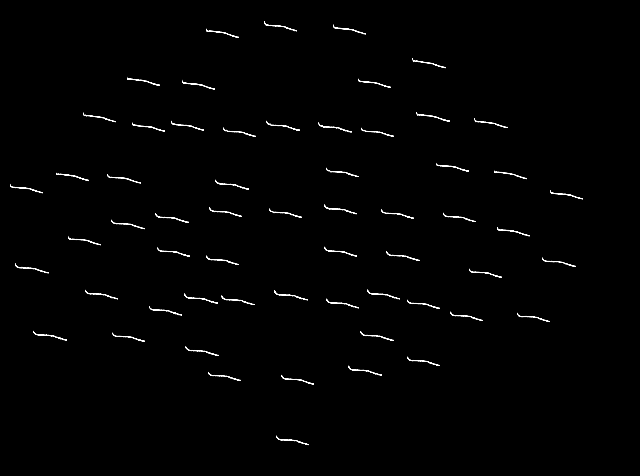

In [35]:
# What if we want to plot the eeg channels 

spectrum.pick("eeg").plot_topo()

### Plotting sensor location from Raw objects

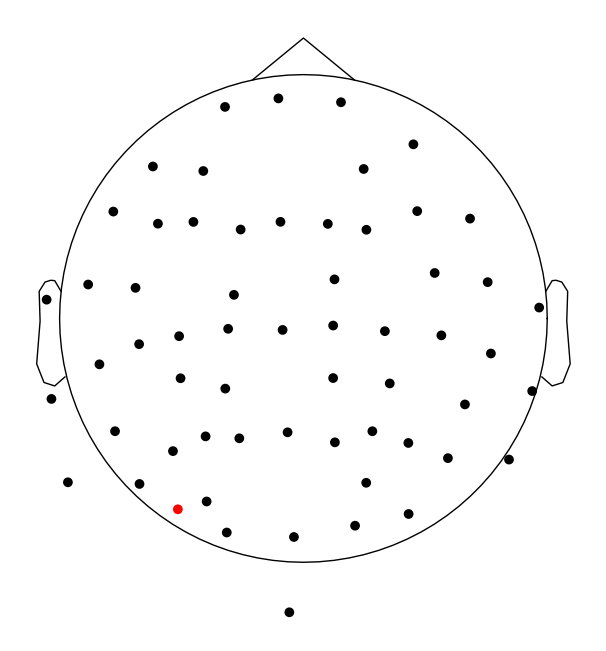

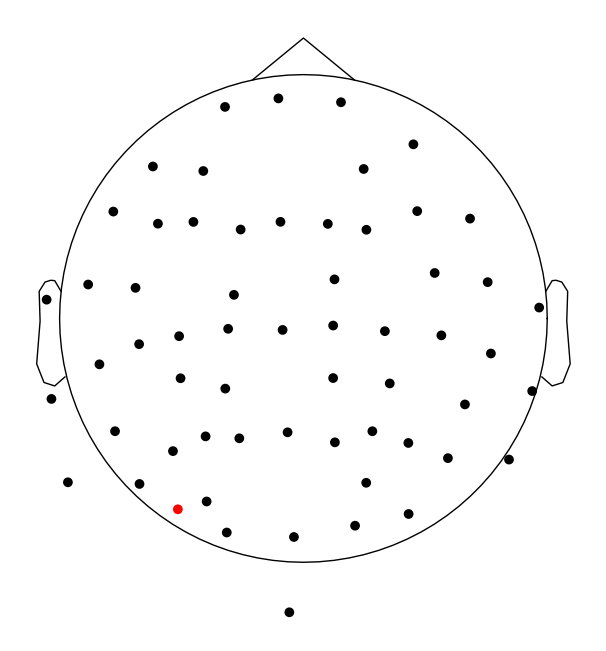

In [37]:
raw.plot_sensors(ch_type="eeg")

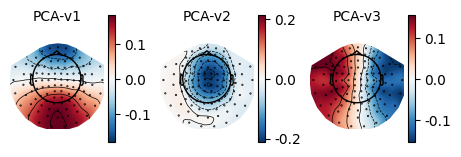

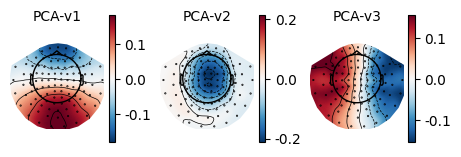

In [38]:
## Plotting projectors from Raw objects 

raw.plot_projs_topomap(colorbar=True)

Effective window size : 4.096 (s)
Plotting amplitude spectral density (dB=True).


/home/parthshr370/parthpython/lib/python3.12/site-packages/mne/viz/utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


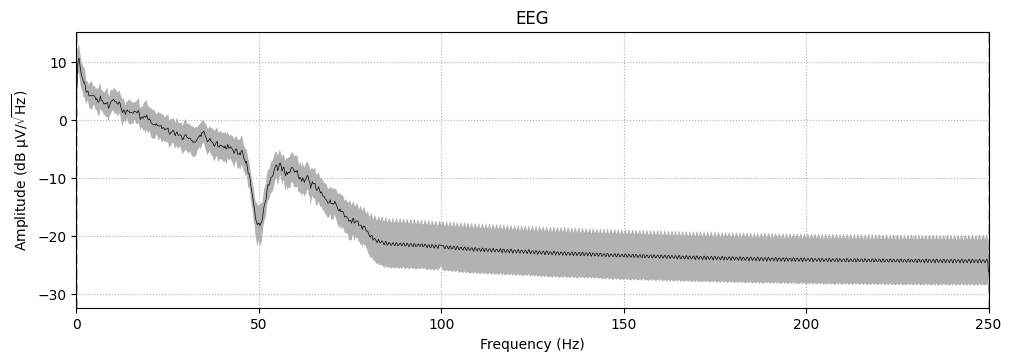

In [41]:
data_spectrum = data.compute_psd()

data_spectrum.plot(average = True , picks = 'data',exclude = 'bads',amplitude = True ,spatial_colors='blue')


#### "raw" objects refer to unprocessed MEG data files.
 These files contain the digital recordings of the magnetic fields measured by the MEG system during an experiment.

In [45]:
data_spectrum.plot_topo()

RuntimeError: No digitization points found.